In [33]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data\Olympics_Country.csv
Data\Olympics_Games.csv
Data\Olympic_Athlete_Bio.csv
Data\Olympic_Athlete_Event_Results.csv
Data\Olympic_Results.csv
Data\Pipfile


## Data Exploration

### Athlete Event Results

##### Primary Key => editionID

In [9]:
path_Olympic_Athlete_EventResults ="Data\Olympic_Athlete_Event_Results.csv"

In [10]:
AER = pd.read_csv(path_Olympic_Athlete_EventResults, sep = ",")
AER.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False


In [11]:
AER.shape

(314907, 11)

### Null values or Not available data

In [12]:
AER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314907 entries, 0 to 314906
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      314907 non-null  object
 1   edition_id   314907 non-null  int64 
 2   country_noc  314907 non-null  object
 3   sport        314907 non-null  object
 4   event        314907 non-null  object
 5   result_id    314907 non-null  int64 
 6   athlete      314907 non-null  object
 7   athlete_id   314907 non-null  int64 
 8   pos          314907 non-null  object
 9   medal        314907 non-null  object
 10  isTeamSport  314907 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.3+ MB


In [13]:
column_vals_AER = AER.columns
column_vals_AER

Index(['edition', 'edition_id', 'country_noc', 'sport', 'event', 'result_id',
       'athlete', 'athlete_id', 'pos', 'medal', 'isTeamSport'],
      dtype='object')

##### Medal column

In [14]:
AER.loc[AER['medal'] == 'na'].shape

(270336, 11)

In [15]:
column = pd.unique(AER['medal'])
column

array(['na', 'Bronze', 'Silver', 'Gold'], dtype=object)

In [16]:
AER["medal"].value_counts()

na        270336
Gold       15027
Bronze     14904
Silver     14640
Name: medal, dtype: int64

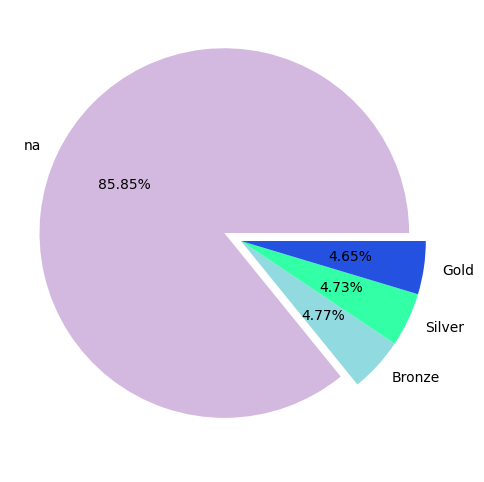

In [17]:
sizes = [270336,15027, 14904, 14640]
labels = ['na', 'Bronze', 'Silver', 'Gold']
myexplode = [0.2, 0, 0, 0]
plt.figure(figsize = (6, 6))
plt.pie(sizes, labels = labels, autopct='%.2f%%',explode=(0.1, 0, 0, 0),
        colors=['#D3B9DF','#90DAE0','#33FFA7', '#2451E0'])
plt.show()

As we can see above, the medal column has an approx. of 86 % data as not available. Accordint to the above diagram, it is safe to say that the largest chunk can be attributed to the people who did not win a medal. The NA values in this case are relevant.

### Data variance 

#### Pos column

In [18]:
AER.tail()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False
314906,2022 Winter Olympics,62,UKR,Bobsleigh,"Monobob, Women",19019671,Lidiya Hunko,149047,20,na,False


In [19]:
#[print(i) for i in AER['pos'].unique()]

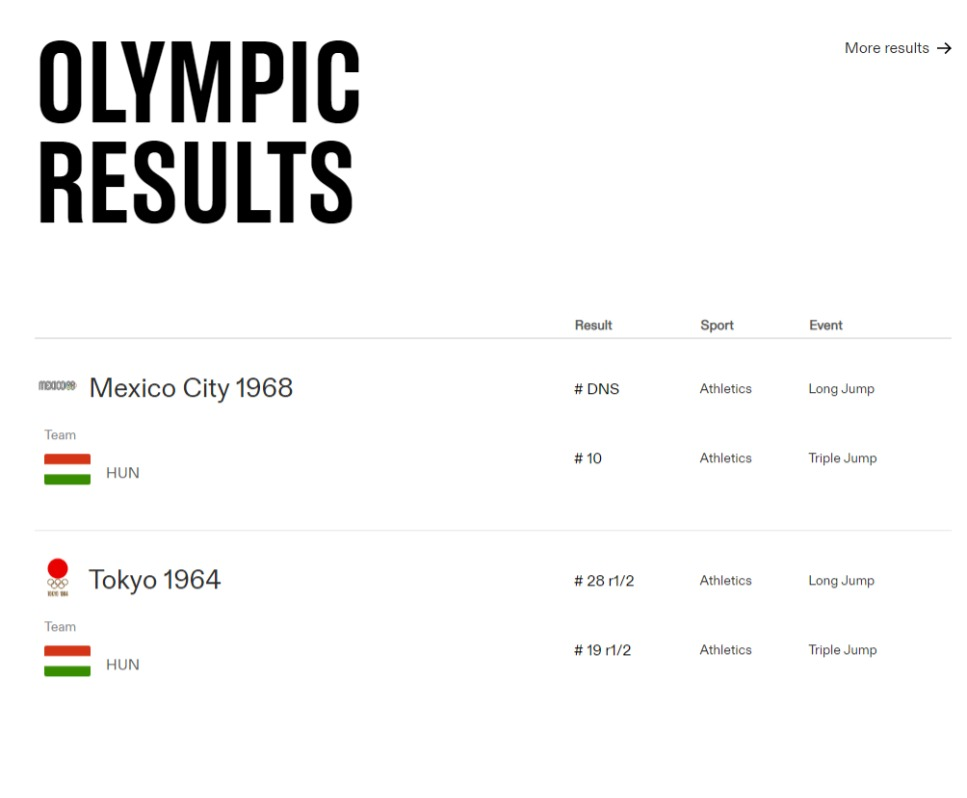

In [20]:
Image(filename= "Images/Olympics_pic.jpeg", width =600, height = 600)

##### The pos column is a bit strange as I cannot interprate the results. => DNS => Did not start.